# Notebook to study short term persistence from multiple exposures in a single visit 


In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sigmaclip
from astropy.wcs import WCS
import os,glob

%matplotlib notebook

In [3]:
pwd

'/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence/Pixel_based'

In [4]:
# The project dir 
pdir = '/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence/'

#The mosaic dir
mdir = pdir+'/Mosaic_hi_res_folder/'

#The dir to save/load the Persistence curves dataframes
sdir = pdir+'/PD_dataframes_dir/'

In [5]:
# conversion factor from days to seconds
daytosec = 24.*3600.

In [6]:
#Read files header, make sure they are sorted by EXPSTART
#This now copies the files into the mosaic hi res directory, keeping visit structure

sflts= []

for vis in ['1','2','3']:
    qldir = pdir+'/14016_data/Visit0'+vis+'/'
    wdir = mdir+'/Visit0'+vis+'/'
    if not os.path.isdir(wdir):
        os.mkdir(wdir)
    flts = glob.glob(qldir+'*_flt.fits')
    print('***************')
    starttimes = []
    endtimes   = []
    imagetypes = []
    for flt in flts:
        starttimes.append(fits.getheader(flt,0)['EXPSTART'])
        endtimes.append(fits.getheader(flt,0)['EXPEND'])
        imagetypes.append(fits.getheader(flt,0)['IMAGETYP'])
        filename = os.path.split(flt)[-1]
        if not os.path.exists(wdir+filename):
            shutil.copy(flt, wdir)
            shutil.copy(flt.replace('_flt','_ima'), wdir)
            
    flts = glob.glob(wdir+'*_flt.fits')    
    ii = np.argsort(starttimes)
    for jj in range(len(flts)):
        print(starttimes[ii[jj]],endtimes[ii[jj]],(-starttimes[ii[jj]]+endtimes[ii[jj]])*daytosec,imagetypes[ii[jj]],flts[ii[jj]][-18:])

    sflts.append([flts[i] for i in ii])

***************
57247.89789127 57247.90197646 352.96041641850024 EXT icrr01y7q_flt.fits
57247.9027409 57247.90682572 352.9284480493516 EXT icrr01y8q_flt.fits
57247.90759053 57247.91167535 352.9284480493516 EXT icrr01yaq_flt.fits
57247.91243979 57247.91652498 352.9604157898575 EXT icrr01ycq_flt.fits
57247.91728942 57247.9213746 352.9595520347357 EXT icrr01yeq_flt.fits
57247.92213905 57247.92622386 352.927583665587 EXT icrr01ygq_flt.fits
57247.92698868 57247.93107349 352.927583665587 EXT icrr01yiq_flt.fits
57247.93219683 57247.93913238 599.2315201554447 DARK icrr01ykq_flt.fits
57247.93937275 57247.94345794 352.9604157898575 DARK icrr01ymq_flt.fits
57247.94370164 57247.94778646 352.9284480493516 DARK icrr01yoq_flt.fits
57247.94803016 57247.95211535 352.96041641850024 DARK icrr01yqq_flt.fits
57247.95235905 57247.95644386 352.927583665587 DARK icrr01ysq_flt.fits
57247.95668757 57247.96077275 352.9595520347357 DARK icrr01yuq_flt.fits
57247.96125942 57247.96534423 352.927583665587 DARK icrr01

<IPython.core.display.Javascript object>


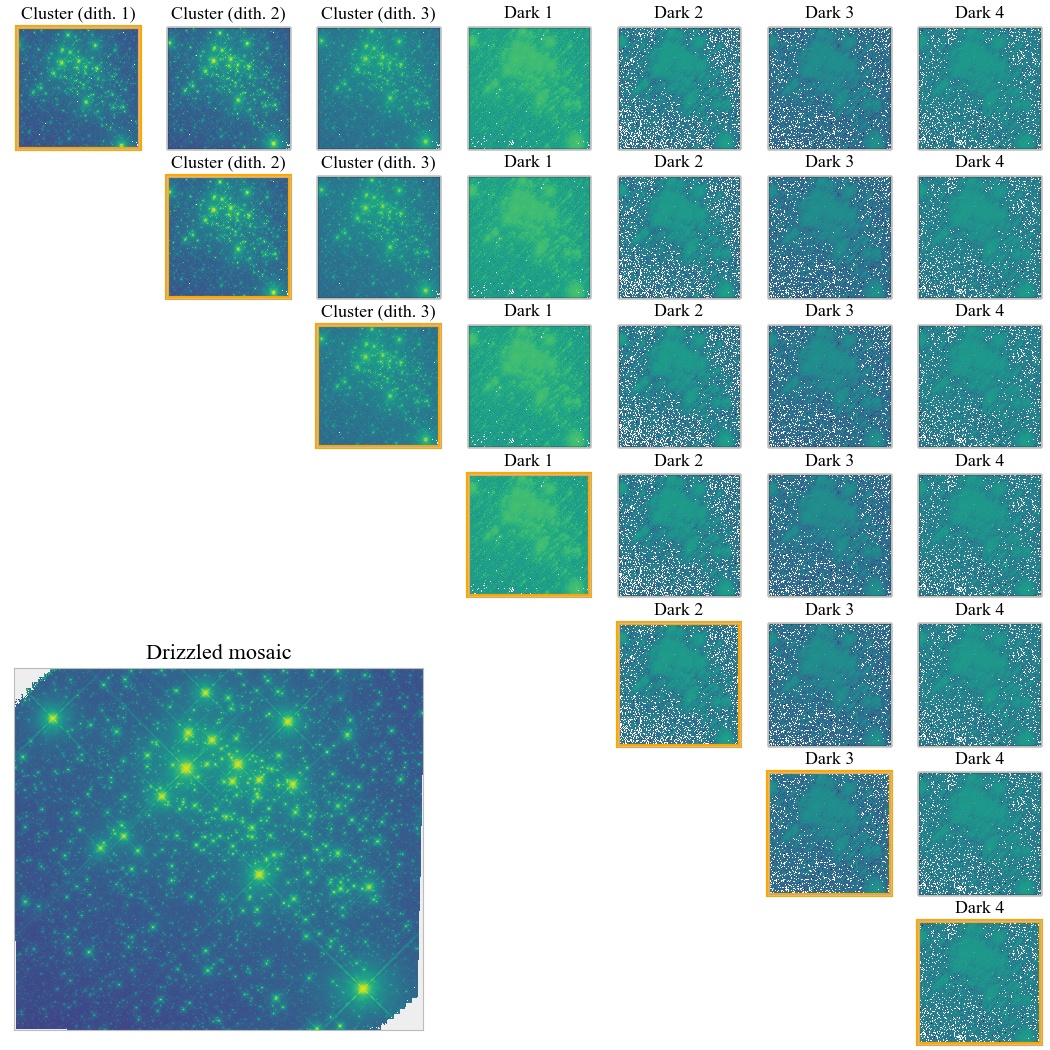

/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03rqq_flt.fits clipped mean:  14.0028 AD sky:


/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log10
/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03rrq_flt.fits clipped mean:  13.7274 AD sky:
/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03rtq_flt.fits clipped mean:  13.4231 AD sky:
/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03ruq_flt.fits clipped mean:  0.0379592 AD sky:
/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03rwq_flt.fits clipped mean:  0.0183146 AD sky:
/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03ryq_flt.fits clipped mean:  0.0239312 AD sky:
/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence//Mosaic_hi_res_folder//Visit03/icrr03s0q_flt.fits clipped mean:  0.0244334 AD sky:


/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log10
/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in log10


In [7]:
# Choose which visit to work on

from matplotlib.path import Path
import matplotlib.patches as patches


plt.style.use('bmh')

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 21
#axarr[j,k].set_axis_bgcolor('#FFFFFF')

visit_index = 2
vsflts = sflts[visit_index]

vsflts = vsflts[0:7]

#plot all exposures multiple times for visualization of the selected pixels

sf=1.5
fig = plt.figure(figsize=(sf*len(vsflts),sf*len(vsflts)))

name = ['Cluster (dith. 1)','Cluster (dith. 2)','Cluster (dith. 3)','Dark 1','Dark 2','Dark 3','Dark 4']

ax = []
for i,flt in enumerate(vsflts):
    im = fits.getdata(flt)
    c, low, upp = sigmaclip(im, 2.,2.)
    mn = np.mean(c)
    print(flt,'clipped mean: ',mn, 'AD sky:')
    j = -1
    while j < i: 
        j+=1
        ax.append(plt.subplot(len(vsflts),len(vsflts),j*len(vsflts)+1+i))
            
        ax[-1].imshow(np.log10(im/mn),cmap='viridis', interpolation='none', origin='lower')
        #ax[-1].set_title(flt[-18:-9],fontsize=6)

        ax[-1].set_title(name[i],fontsize=13)
        
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ax[-1].set_axis_bgcolor('#FFFFFF')

        if j == i:
            dst = .15
            autoAxis = ax[-1].axis()
            rec = patches.Rectangle((autoAxis[0]-dst,autoAxis[2]-dst),(autoAxis[1]-autoAxis[0])+2*dst,(autoAxis[3]-autoAxis[2])+2*dst,fill=False,lw=3,color='orange')
            rec = ax[-1].add_patch(rec)
            rec.set_clip_on(False)
        else:
            dst = .02
            autoAxis = ax[-1].axis()
            rec = patches.Rectangle((autoAxis[0]-dst,autoAxis[2]-dst),(autoAxis[1]-autoAxis[0])+2*dst,(autoAxis[3]-autoAxis[2])+2*dst,fill=False,lw=1,color='black')
            rec = ax[-1].add_patch(rec)
            rec.set_clip_on(False)

            
# Read the mosaic file and plot it

plt.tight_layout(pad=.225)
mosaic = fits.open(mdir+'/F140W_Mosaic_WFC3_IR_drz.fits')

ax.append(plt.subplot(len(vsflts),len(vsflts),j*len(vsflts)+1))

pos1 = ax[-1].get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width * len(vsflts)/2.2, pos1.height * len(vsflts)/2.2] 
ax[-1].set_position(pos2) # set a new position
ax[-1].get_xaxis().set_ticks([])
ax[-1].get_yaxis().set_ticks([])
        
c, low, upp = sigmaclip(mosaic[1].data[np.where(np.isfinite(mosaic[1].data))], 2.,2.)
mn = np.mean(c)
im = ax[-1].imshow(np.log10(mosaic[1].data/mn),cmap='viridis', interpolation='none', origin='lower')
ax[-1].set_title('Drizzled mosaic',fontsize=16)

plt.savefig('/Users/gennaro/Congressi_Seminari/SDW_2017/Mosaic.pdf',format='pdf')
plt.savefig('/Users/gennaro/Congressi_Seminari/SDW_2017/Mosaic.png',dpi=300)
